In [1]:
import sys
import os
import shutil
import re
import numpy as np
import matplotlib.pyplot as plt
from hyperparameters import *

import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision import transforms as T

from data_manager import rgbd_gradients_dataset, rgbd_gradients_dataloader
from functions import torch2np_u8
import plot
import gardients_to_navigation
from lines_utils import get_line

np.set_printoptions(threshold=sys.maxsize)
%matplotlib notebook

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
CWD             = os.getcwd()
DATASET_DIR     = os.path.join(CWD,'data/nyuv2')
print(DATASET_DIR)

C:\Users\tomav\Documents\GitHub\cs236781-project\data/nyuv2


In [4]:
rgbd_grads_ds = rgbd_gradients_dataset(root=DATASET_DIR, use_transforms=True)

In [5]:
# _ = plot.rgbd_gradients_dataset_first_n(dataset=rgbd_grads_ds,n=2)
# print(f'Found {len(rgbd_grads_ds)} images in dataset folder.')

<IPython.core.display.Javascript object>


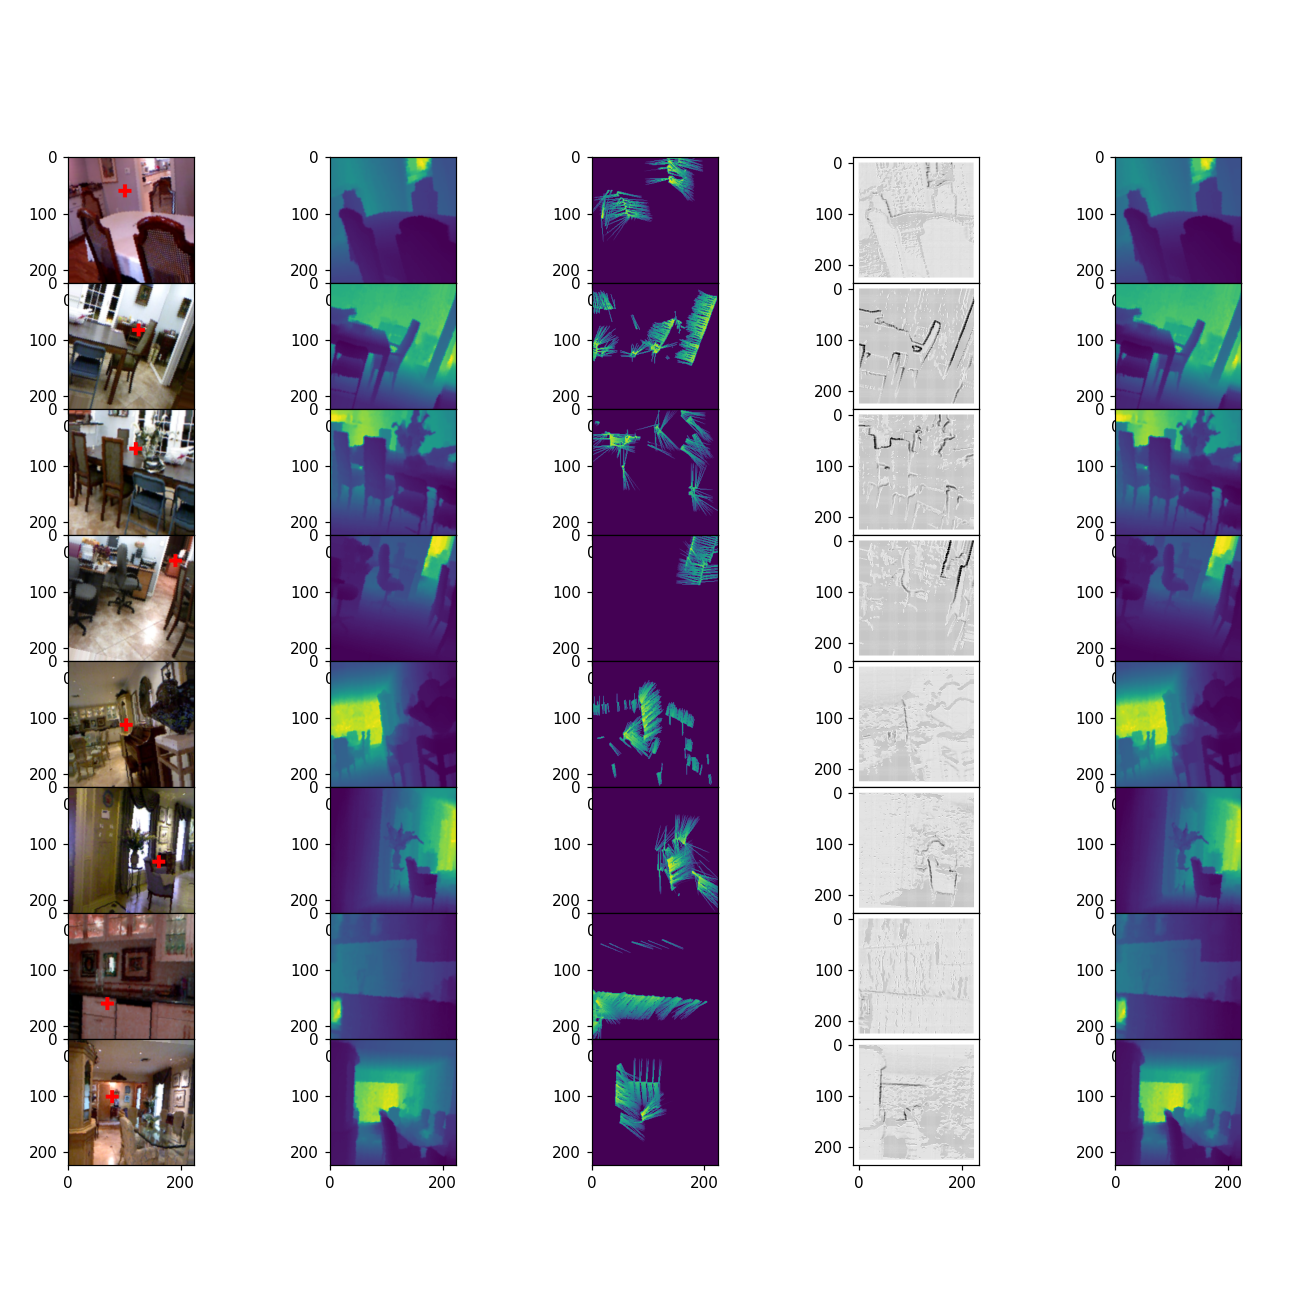

In [6]:
_ = gardients_to_navigation.rgbd_gradients_dataset_first_n(dataset=rgbd_grads_ds,n=8, random_start=True)

In [7]:
dl_train,dl_test = rgbd_gradients_dataloader(root=DATASET_DIR,
                                             batch_size=BATCH_SIZE,
                                             num_workers=NUM_WORKERS,
                                             train_test_ration=TRAIN_TEST_RATIO,
                                             use_transforms=True)

In [8]:
sample_batch = next(iter(dl_test))
print(sample_batch.keys())
print(sample_batch['rgb'].shape, sample_batch['rgb'].min(),sample_batch['rgb'].max(),
      sample_batch['rgb'].mean(), sample_batch['rgb'].std())
print(sample_batch['depth'].shape, sample_batch['depth'].min(),sample_batch['depth'].max(),
      sample_batch['depth'].mean(), sample_batch['depth'].std())
print(sample_batch['x'].shape, sample_batch['x'].min(),sample_batch['x'].max(),
      sample_batch['x'].mean(), sample_batch['x'].std())
print(sample_batch['y'].shape, sample_batch['y'].min(),sample_batch['y'].max(),
      sample_batch['y'].mean(), sample_batch['y'].std())

dict_keys(['rgb', 'depth', 'x', 'y'])
torch.Size([4, 3, 224, 224]) tensor(-1.) tensor(1.) tensor(-0.0303) tensor(0.6099)
torch.Size([4, 1, 224, 224]) tensor(-1.) tensor(0.9843) tensor(0.0105) tensor(0.4844)
torch.Size([4, 1, 224, 224]) tensor(-1.) tensor(1.) tensor(0.1463) tensor(0.4281)
torch.Size([4, 1, 224, 224]) tensor(-1.) tensor(1.) tensor(0.2529) tensor(0.1142)
